In [1]:
import pandas as pd
data=pd.read_pickle('corpus.pkl')
#data.append(movies)
data
movies=['batman','blade_runner','dead_poet','la_chinoise','new_land','orange','pretty-poison','rain_man','superman','weekend_1967']


In [2]:

from textblob import TextBlob
pol=lambda x: TextBlob(x).sentiment.polarity
sub= lambda x: TextBlob(x).sentiment.subjectivity
data['polarity']=data['transcript'].apply(pol)
data['subjectivity']=data['transcript'].apply(sub)
data['movies']=movies
data

,transcript,polarity,subjectivity,movies
batman,"by Pauline Kael In Batman, the movement of the...",0.038153,0.496259,batman
blade_runner,"by Pauline Kael Ridley Scott, the director of ...",0.038437,0.491759,blade_runner
dead_poet,"by Pauline Kael In Dead Poets Society, Robin W...",0.105200,0.510882,dead_poet
la_chinoise,"by Pauline Kael A few weeks ago, I was startle...",0.096195,0.445722,la_chinoise
new_land,by Pauline Kael Seeing The New Land a year aft...,0.148240,0.420774,new_land
orange,by Pauline Kael Literal-minded in its sex and ...,0.006532,0.531914,orange
pretty-poison,by Pauline Kael When I discovered that Pretty ...,0.121999,0.505419,pretty-poison
rain_man,"The following review is from “Rain Man: Stunt,...",0.001471,0.412774,rain_man
superman,"by Pauline Kael Christopher Reeve, the young a...",0.147160,0.518939,superman
weekend_1967,by Pauline Kael Only the title of Jean-Luc God...,0.116189,0.538116,weekend_1967


In [3]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10,4]

for index, movie in enumerate(data.index):
    x = data.polarity.loc[movie]
    y = data.subjectivity.loc[movie]
    plt.scatter(x, y, color='red')
    plt.text(x+.001, y+.001, data['movies'][index], fontsize=10)
    plt.xlim(-.01, .20) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative ----polarity ---- Positive -->', fontsize=15)
plt.ylabel('<-- Facts ----subjectivity ---- Opinions -->', fontsize=15)

plt.show()

## What is polarity and subjectivity suggests?? 

<Figure size 1000x400 with 1 Axes>

In [4]:
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [5]:

list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
len(list_pieces)

10

In [6]:

polarity_transcript=[]
for lp in list_pieces:
    polarity_piece=[]
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
polarity_transcript

[[-0.1988425925925926,
  0.012317370129870131,
  -0.023333333333333338,
  0.1257996632996633,
  0.1869047619047619,
  0.0625,
  0.061250000000000006,
  0.10312500000000002,
  0.005037386855568666,
  0.08600895316804408],
 [0.0789361001317523,
  0.09048941798941798,
  -0.02091224747474748,
  -0.08143274853801169,
  -0.010740740740740747,
  -0.03679292929292931,
  0.20342857142857146,
  0.028720238095238094,
  -0.06555555555555555,
  0.11556818181818182],
 [0.11249999999999999,
  0.028113553113553107,
  0.20833333333333334,
  0.2117316017316017,
  0.13181818181818183,
  0.09090909090909091,
  0.08181818181818182,
  0.2848958333333333,
  -0.015833333333333328,
  0.022623966942148764],
 [0.07803030303030303,
  0.1053814002089864,
  0.23863636363636365,
  0.07581699346405234,
  0.13996639325586693,
  0.1311065197428834,
  0.004377880184331796,
  0.02587594696969697,
  0.0987601166948993,
  0.08862121212121213],
 [0.0265712682379349,
  0.4265151515151515,
  0.11666666666666665,
  -0.125,
  0

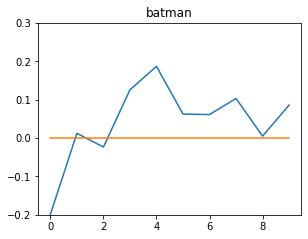

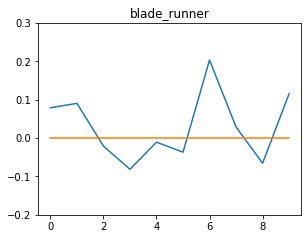

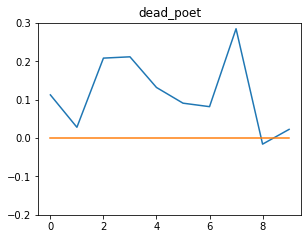

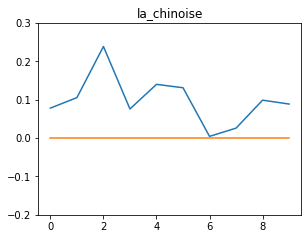

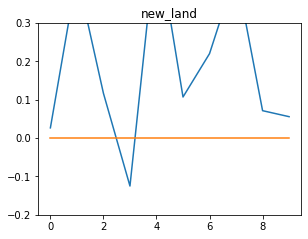

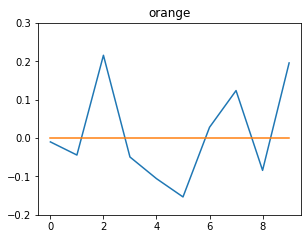

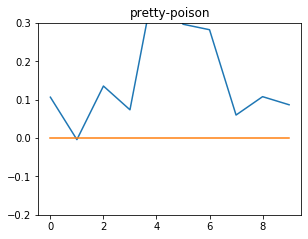

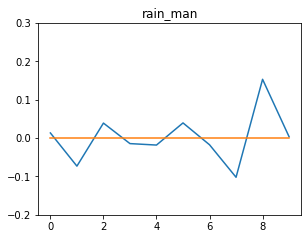

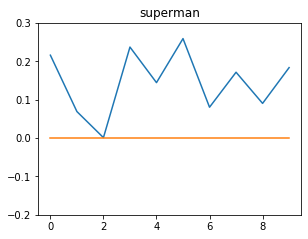

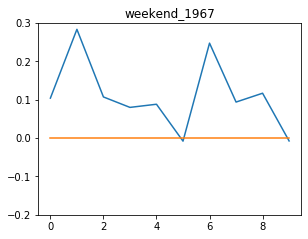

In [7]:
plt.rcParams['figure.figsize']=[16,12]

for index,comedian in enumerate(data.index):
    plt.subplot(3,3,9)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))#base line
    plt.title(data['movies'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    plt.show()

In [8]:
data=pd.read_pickle('corpus.pkl')
data

,transcript
batman,"by Pauline Kael In Batman, the movement of the..."
blade_runner,"by Pauline Kael Ridley Scott, the director of ..."
dead_poet,"by Pauline Kael In Dead Poets Society, Robin W..."
la_chinoise,"by Pauline Kael A few weeks ago, I was startle..."
new_land,by Pauline Kael Seeing The New Land a year aft...
orange,by Pauline Kael Literal-minded in its sex and ...
pretty-poison,by Pauline Kael When I discovered that Pretty ...
rain_man,"The following review is from “Rain Man: Stunt,..."
superman,"by Pauline Kael Christopher Reeve, the young a..."
weekend_1967,by Pauline Kael Only the title of Jean-Luc God...


In [19]:
superman_text=data.transcript.loc['superman']
superman_text[:4000]

'by Pauline Kael Christopher Reeve, the young actor chosen to play the lead in Superman, is the best reason to see the movie. He has an open-faced, deadpan style that’s just right for a windup hero. Reeve plays innocent but not dumb, and the combination of his Pop jawline and physique with his unassuming manner makes him immediately likable. In this role. Reeve comes close to being a living equivalent of comic-strip art—that slang form of simplified storytelling in which the visual and verbal meanings can be totally absorbed at a glance. But Superman, one of the two or three most expensive movies ever made, and with the biggest event promotion yet, is a cheesy-looking film, with a John Williams “epic” score that transcends self-parody—cosmic fanfares keep coming when there’s nothing to celebrate. The sound piercing your head tells you that you should remember each name in the euphoric opening credits. That’s where the peak emotion in the film is: in the package.\nSuperman gives the imp

In [20]:
from collections import defaultdict
def markov_chain(text):
    words=text.split(' ')
    m_dict= defaultdict(list)

    for first_word,next_word in zip(words[0:-1],words[1:]) :
        m_dict[first_word].append(next_word)
        
    m_dict=m_dict
    return m_dict

In [21]:
superman_dict = markov_chain(superman_text)

In [22]:
import random

def generate_sentence(chain, count=40): #chain == dict
   
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # End it with a period
    sentence += '.'
    return(sentence)

In [23]:
generate_sentence(superman_dict) #Generation of movie review in Pauline Kael style

'Trick effect on Earth, and a back tooth. Of all the two looming figures, has become reflections trapped in her lewdness makes him of comic-strip art—by the film rallies when he confers a farming area, in the quasi-religious feelings that.'

In [24]:
generate_sentence(superman_dict)

'By a funny maniac, and Joe Shuster, the lead in his mystical mission to Earth. York City) when there’s so long is in disguise as an era in the literal-minded. With astronomic sums of Al Pacino, Dustin Hoffman, and finally.'

In [25]:
generate_sentence(superman_dict)

'Feel, and, for a space-adventure picture—a supremely human beings, with white hair, and crisp, posterish sophistication—and the people acknowledge the enlargement of view (as it would function satirically, as star-studded, a joyride in 1938, provided a joyride in hand in.'